In [12]:
import pickle
import numpy as np
import Instaplot as IP
import Instalib as IL
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/eartiges/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
A=pickle.load(open('todo/torinojazzfestival/pickle/A.pkl','r'))
C=pickle.load(open('todo/torinojazzfestival/pickle/C.pkl','r'))
Grid=pickle.load(open('todo/torinojazzfestival/pickle/Grid.pkl','r'))
TermVectors=open('todo/torinojazzfestival/TermVectors.txt', 'r').readlines()
tjf=7
TJF_vec=A.T[tjf]
neighbourhoods, relevant_bins_by_ngh=IP.relevant_bins_to_ngbh(TJF_vec, Grid)

otsu threshold 0.05614643737846956


In [5]:
def neighbourhood_relative_dynamics(row, C):
    C_Q=C*row
    C_Q=C_Q.T
    
    C_Q_Norm=[]
    for i in range(C_Q.T.shape[0]):
        C_row=C_Q.T[i]
        N=np.sqrt(sum([r**2 for r in C_row]))
        if not N==0:
            C_row=[r/N for r in C_row]
        C_Q_Norm.append(C_row)
    return np.array(C_Q_Norm).T

C_Q1_Norm=neighbourhood_relative_dynamics(A[252],C)

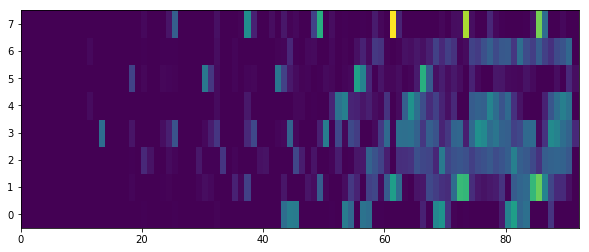

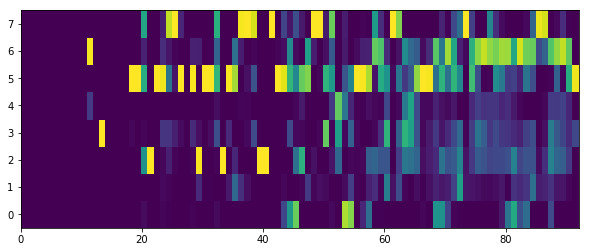

In [8]:
#General Topics Dynamics
n_topics=8
plt.figure(figsize=(10,4))
plt.pcolormesh([c for c in C.T])#, cmap=plt.cm.Greys)
plt.xlim(0,len(C.T[0]))
#plt.savefig('Topic_dynamic.pdf')
plt.yticks(np.arange(n_topics)+0.5, np.arange(0,n_topics));
#plt.xticks(flags[start:stop])
plt.show()

#Neighbourhood relative Topics Dynamics
plt.figure(figsize=(10,4))
plt.pcolormesh([c for c in C_Q1_Norm])#, cmap=plt.cm.Greys)
plt.xlim(0,len(C_Q1_Norm[0]))
#plt.savefig('Topic_dynamic.pdf')
plt.yticks(np.arange(n_topics)+0.5, np.arange(0,n_topics));
#plt.xticks(flags[start:stop])
plt.show()

In [9]:
import json

data = {'topics':{}, 'bbox':{}, 'grid':{}, 'activity':{},
}

topics={}
TermVectors=open('todo/torinojazzfestival/TermVectors.txt', 'r').readlines()
TermVectors=[t[3:-1].split(' ')[0:3] for t in TermVectors]
for i,t in enumerate(TermVectors):
    topics[str(i)]=[w[2:-2] for w in t]
data['topics'] = topics

lats=sorted(set([s[0] for s in Grid]))
lons=sorted(set([s[1] for s in Grid]))
data['bbox']=[min(lons),min(lats),max(lons),max(lats)]

def grid_to_index(Grid):
    lats=sorted(set([s[0] for s in Grid]))
    lons=sorted(set([s[1] for s in Grid]))
    size=[len(lats), len(lons)]
    grid2=[(lats.index(s[0]),lons.index(s[1])) for s in Grid]
    return size, [s[0]*size[0]+s[1] for s in grid2]

size,indices = grid_to_index(Grid)
data['grid']=size

In [10]:
#convert coordinates to index: nrows*ncol+ncol
coords_indices= [d[1] for d in relevant_bins_by_ngh.values()]

In [13]:
timestamps=[]
for i in range(len(C_Q1_Norm.T)):
    s=IL.abs_to_yearmonth(i,[i for i in range(2010,2018)])
    s=s.timestamp()
    timestamps.append(s)

In [14]:
coords_bins=grid_to_index(Grid)[1]

activity={}

all_neighbourhoods=[neighbourhood_relative_dynamics(A[ic], C) for ic in range(len(coords_bins))]

for i,t in enumerate(timestamps):
    #For each timestep
    for ic, index in enumerate(coords_bins):
        #For each coordinates, take the corresponding 
        topics_intensities=all_neighbourhoods[ic].T[i]
        #topics_int = [1,2,3,4,5] intensities at time t
        local_dict={}
        for to,tp in enumerate(topics_intensities):
            local_dict[str(to)]=tp
        try:
            activity[str(int(t))][str(index)]=local_dict
        except KeyError:
            activity[str(int(t))]={str(index):local_dict}
data['activity']=activity

In [15]:
data['bbox']

[7.576453909502152, 45.00449999999999, 7.767617590986647, 45.1395]

In [16]:
data['grid']

[31, 31]

In [18]:
data['topics']

{'0': ['tff', 'torinofilmfestival', 'film'],
 '1': ['music', 'festival', 'liv'],
 '2': ['torinojazzfestival', 'jazz', 'festival'],
 '3': ['reloadmusicfestival', 'festival', 'rmf'],
 '4': ['festival', 'film', 'cinem'],
 '5': ['festival', 'techn', 'kapp'],
 '6': ['festival', 'music', 'movement'],
 '7': ['gruvillag', 'gruvillagefestival', 'music']}

In [ ]:
json.dump(data,open('JSON_Torino_seed_festival.json', 'wb'))
#data=json.load(open('try1.json', 'rb'))